# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
num_unique_mice = merged_df['Mouse ID'].nunique()

print(f"Number of mice: {num_unique_mice}")

Number of mice: 249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()


print(duplicate_mice)

['g989']


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mice = duplicate_rows['Mouse ID'].unique()


duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]

print("Data for mice:")
print(duplicate_data)


Data for mice:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21    

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID'])


print(clean_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [16]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_df['Mouse ID'].nunique()

print(f" unique mice in DataFrame: {num_unique_mice_clean}")

 unique mice in DataFrame: 249


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_regimen = clean_df.groupby('Drug Regimen')


summary_df = grouped_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


summary_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Standard Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume'
}, inplace=True)

# Display the summary statistics DataFrame
print(summary_df)



              Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin                  45.0                 45.0                    0.0   
Ceftamin                   45.0                 45.0                    0.0   
Infubinol                  45.0                 45.0                    0.0   
Ketapril                   45.0                 45.0                    0.0   
Naftisol                   45.0                 45.0                    0.0   
Placebo                    45.0                 45.0                    0.0   
Propriva                   45.0                 45.0                    0.0   
Ramicane                   45.0                 45.0                    0.0   
Stelasyn                   45.0                 45.0                    0.0   
Zoniferol                  45.0                 45.0                    0.0   

              Standard Deviation Tumor Volume  SEM 

In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_Tumor_Volume='var',
    Standard_Deviation_Tumor_Volume='std',
    SEM_Tumor_Volume='sem'
)


print(summary_df)


              Mean_Tumor_Volume  Median_Tumor_Volume  Variance_Tumor_Volume  \
Drug Regimen                                                                  
Capomulin                  45.0                 45.0                    0.0   
Ceftamin                   45.0                 45.0                    0.0   
Infubinol                  45.0                 45.0                    0.0   
Ketapril                   45.0                 45.0                    0.0   
Naftisol                   45.0                 45.0                    0.0   
Placebo                    45.0                 45.0                    0.0   
Propriva                   45.0                 45.0                    0.0   
Ramicane                   45.0                 45.0                    0.0   
Stelasyn                   45.0                 45.0                    0.0   
Zoniferol                  45.0                 45.0                    0.0   

              Standard_Deviation_Tumor_Volume  SEM_

## Bar and Pie Charts

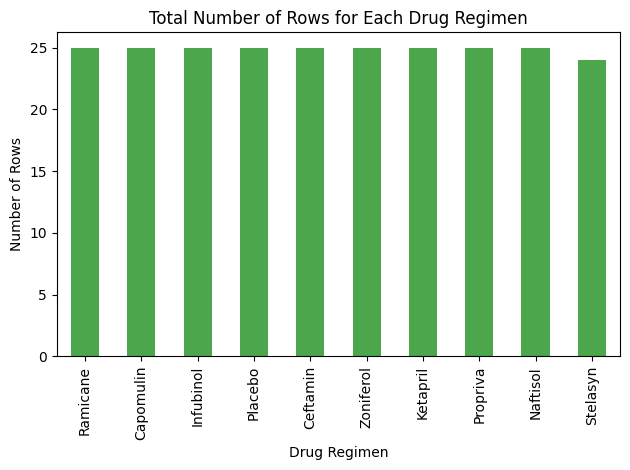

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()


regimen_counts.plot(kind='bar', color='green', alpha=0.7)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')


plt.tight_layout()
plt.show()


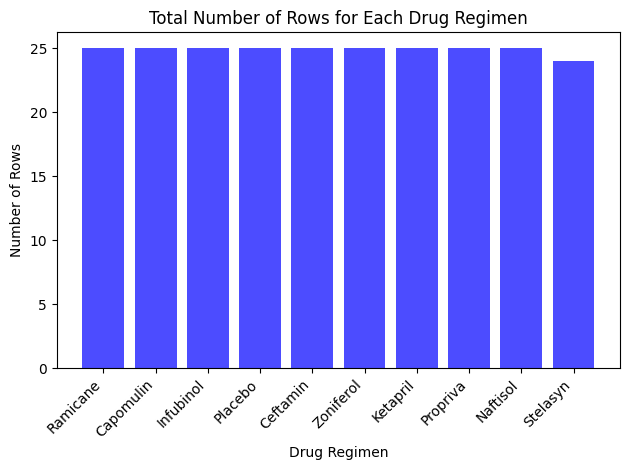

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()


plt.bar(regimen_counts.index, regimen_counts.values, color='blue', alpha=0.7)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


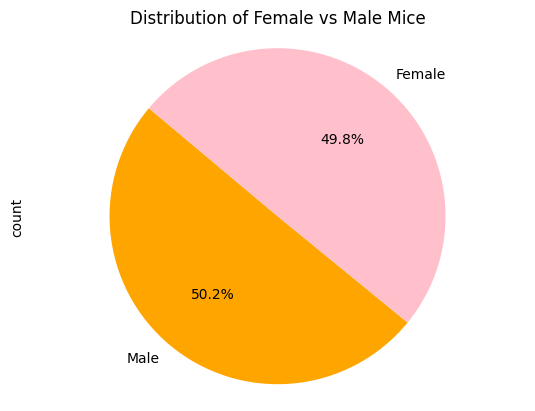

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender_counts = clean_df['Sex'].value_counts()


gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'pink'], startangle=140)


plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')


plt.show()



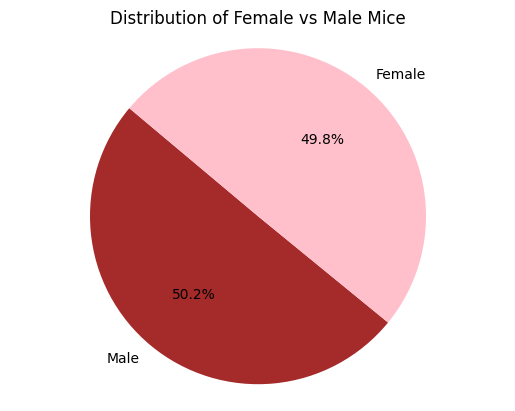

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_df['Sex'].value_counts()


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['brown', 'pink'], startangle=140)


plt.title('Distribution of Female vs Male Mice')


plt.axis('equal')


plt.show()



## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()


final_tumor_data = clean_df[clean_df['Drug Regimen'].isin(desired_regimens) & clean_df['Timepoint'].isin(last_timepoints)]


final_tumor_volume = pd.merge(final_tumor_data, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

print(final_tumor_volume)


   Mouse ID Drug Regimen_x   Sex_x  Age_months_x  Weight (g)_x  Timepoint  \
0      k403       Ramicane    Male            21            16          0   
1      s185      Capomulin  Female             3            17          0   
2      x401      Capomulin  Female            16            15          0   
3      m601      Capomulin    Male            22            17          0   
4      g791       Ramicane    Male            11            16          0   
..      ...            ...     ...           ...           ...        ...   
95     x822       Ceftamin    Male             3            29          0   
96     y163      Infubinol  Female            17            27          0   
97     y769       Ceftamin  Female             6            27          0   
98     y865       Ceftamin    Male            23            26          0   
99     z581      Infubinol  Female            24            25          0   

    Tumor Volume (mm3)_x  Metastatic Sites_x Drug Regimen_y   Sex_y  \
0   

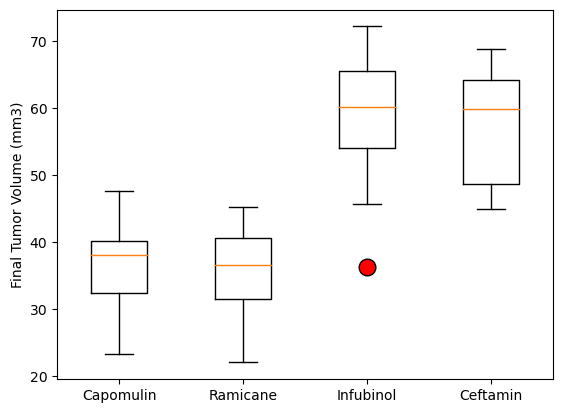

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

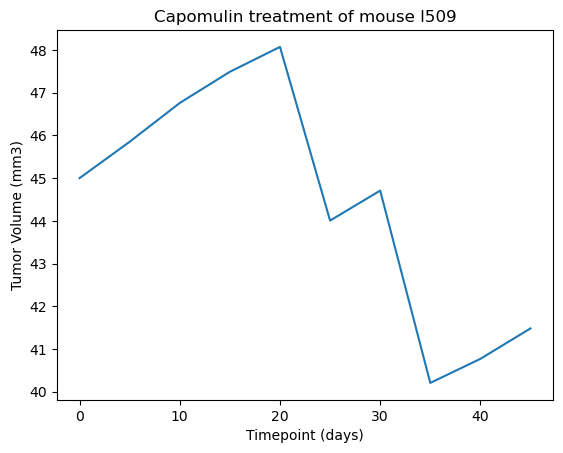

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


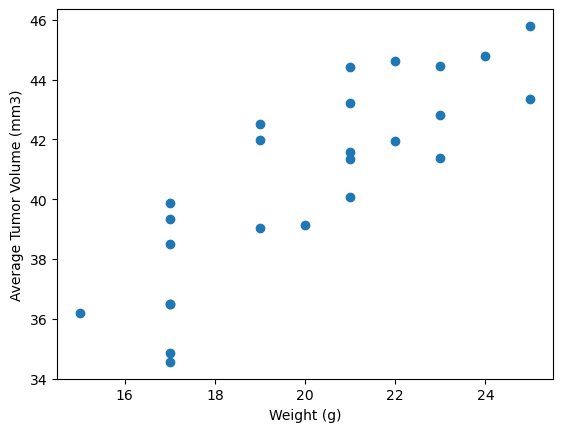

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


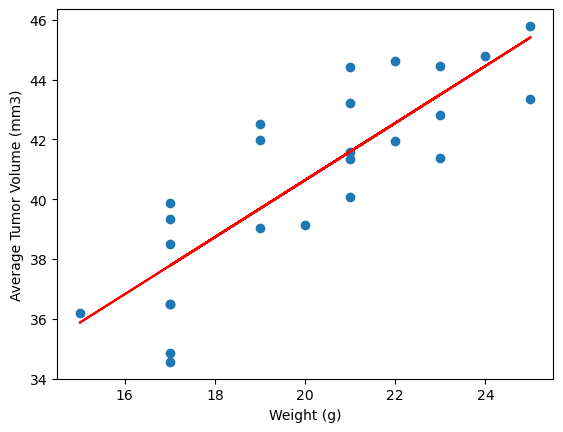

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
